In [1]:
import numpy as np
from math import floor
import matplotlib.pyplot as plt

import ipywidgets as widgets 
from IPython import display 
from matplotlib.animation import FuncAnimation
from IPython.display import HTML 

In [2]:
def RK4(f, x, t, h):
    """
    Given a function f(x,t) and
    scalars x, t, and h, return x(t+h)
    """
    
    k1 = h*f(x, t)
    k2 = h*f(x + (1/2)*k1, t + (1/2)*h)
    k3 = h*f(x + (1/2)*k2, t + (1/2)*h)
    k4 = h*f(x + k3, t + h)
    
    return x + (1/6)*(k1 + 2*k2 + 2*k3 + k4)

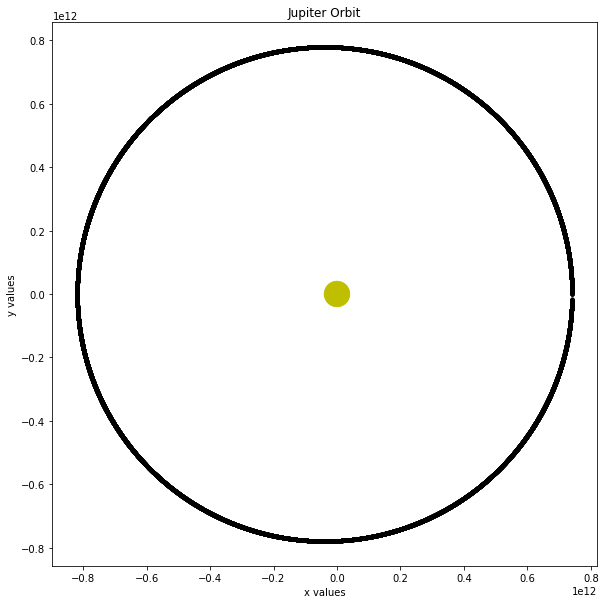

In [18]:
# Plot Jupiter's orbit with constant step size

M = 1.9891e30
G = 6.6738e-11

def f(r, t):
    x, y, dxdt, dydt = r
    
    fx = -G*M*x / np.sqrt(x**2 + y**2)**3
    fy = -G*M*y / np.sqrt(x**2 + y**2)**3
    return np.array([dxdt, dydt, fx, fy])

h = 20000
t_values = np.arange(0, 3.741e8+h, h)
x, y, dxdt, dydt = 7.4052e11, 0, 0, 13720


x_values = []
y_values = []
for t in t_values:
    x_values.append(x)
    y_values.append(y)
    
    r = (x, y, dxdt, dydt)
    x, y, dxdt, dydt = RK4(f, r, t, h)


plt.figure(figsize=(10, 10))

sun = plt.Circle((0, 0), 0.04e12, color='y')
ax = plt.gca()
ax.add_artist(sun)

plt.plot(x_values, y_values, 'k.')
plt.xlabel('x values')
plt.ylabel('y values')
plt.axis('scaled')
plt.title('Jupiter Orbit')
plt.show()

In [10]:
# Animate Jupiter's orbit with constant step size

fig = plt.figure(figsize=(10, 10))
plt.xlim(-1e12, 1e12)
plt.ylim(-1e12, 1e12)
plt.plot(x_values, y_values, color='k', linewidth=1.0)

sun = plt.Circle((0, 0), 0.04e12, color='y')
ax = plt.gca()
ax.add_artist(sun)

line1, = plt.plot([], 'o-', color = 'm', label = 'Jupiter')

plt.legend()

def animate(frame):
    
    line1.set_data(x_values[frame*100], y_values[frame*100])
    
    return line1

plt.close()
anim = FuncAnimation(fig, animate, frames = len(x_values)//100, interval = 20)
HTML(anim.to_html5_video())

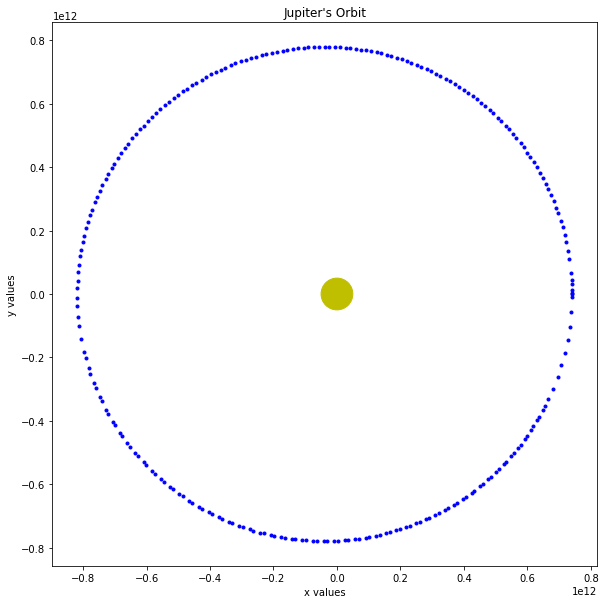

In [22]:
# Plot Jupiter's orbit with adaptive step size

M = 1.9891e30
G = 6.6738e-11

def f(r, t):
    x, y, dxdt, dydt = r
    
    fx = -G*M*x / np.sqrt(x**2 + y**2)**3
    fy = -G*M*y / np.sqrt(x**2 + y**2)**3
    return np.array([dxdt, dydt, fx, fy])

h = 20000
x, y, dxdt, dydt = 7.4052e11, 0, 0, 13720

t_values = []
x_values = []
y_values = []

tmax = 3.741e8
t = 0
delta = 1e3 / 3.154e7

while t < tmax:
    t_values.append(t)
    x_values.append(x)
    y_values.append(y)
    
    rho = 0
    while rho < 1:
        xhh, yhh, dxdthh, dydthh = RK4(f, (x, y, dxdt, dydt), t, h)
        xhh, yhh, dxdthh, dydthh = RK4(f, (xhh, yhh, dxdthh, dydthh), t, h)
        x2h, y2h, dxdt2h, dydt2h = RK4(f, (x, y, dxdt, dydt), t, 2*h)
        
        delx = np.abs(xhh - x2h) / 30
        dely = np.abs(xhh - x2h) / 30
        err = np.sqrt(delx**2 + dely**2)
        if err != 0: 
            rho = delta*h / err
            h = min(h*rho**0.25, 2*h)
        else:
            h = 2*h
    
    (x, y, dxdt, dydt) = (xhh, yhh, dxdthh, dydthh)
    t += h

plt.figure(figsize=(10, 10))

sun = plt.Circle((0, 0), 0.05e12, color='y')
ax = plt.gca()
ax.add_artist(sun)

plt.plot(x_values, y_values, 'b.')
plt.xlabel('x values')
plt.ylabel('y values')
plt.axis('scaled')
plt.title('Jupiter\'s Orbit')
plt.show()